In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data Preparation

In [2]:
# Read data into Pandas
file ="Resources/crypto_data.csv"
df = pd.read_csv(file)
# Discard cryptocurrencies that are not being traded
df = df.loc[df['IsTrading']]
df.drop(columns=['IsTrading'], inplace=True)
# Drop null values
df.dropna(inplace=True)
# Filter for currencies that have been mined
df = df.loc[df['TotalCoinsMined']>0]
# Delete the CoinName from the original dataframe
df.drop(columns=['Unnamed: 0','CoinName'], axis = 1,inplace=True)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [3]:
# Create dummy variables
df = pd.get_dummies(df).copy()
# Standardize dataset
arr_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(
    data=arr_scaled
)
df_scaled

,0,1,2,3,4,5,6,7,8,9,...,367,368,369,370,371,372,373,374,375,376
0,-0.117108,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.043396,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.043396,-0.06143,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


# Dimensionality Reduction

In [4]:
# Perform dimensionality reduction with PCA. Preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)
pca_components = pca.fit_transform(arr_scaled)
df_pca = pd.DataFrame(
    data=pca_components
)
df_pca

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,1.949731e-15,2.334458e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,6.247035e-01,3.229996e-01,-8.825563e-01,-9.070593e-01,-4.436034e-01,-7.526666e-01,7.512989e-01,-1.560008e+00,-2.134376e-01,-6.250111e-01
1,-0.249925,-0.117273,1.590326e-15,1.774411e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.483937e+00,-1.170655e+00,-6.751877e-01,-7.818764e-01,1.793189e-01,1.286871e-01,6.169397e-01,-9.088925e-01,6.137249e-01,-3.627192e-01
2,0.314746,-0.002862,-1.623165e-15,1.791297e-15,-0.081839,2.496209,-0.409761,-0.375692,-1.377915,0.000210,...,1.508092e-01,3.126654e+00,-1.283180e+00,-5.885546e-01,-2.261120e+00,-1.179074e+00,-1.469811e+00,-4.513005e-01,-7.126595e-01,-2.096454e-01
3,-0.250886,-0.222136,-1.753018e-14,-3.720486e-15,0.000999,-1.566613,0.156332,-0.120727,0.360156,0.209244,...,4.846588e-15,-2.907953e-15,-1.959911e-15,-1.671431e-15,1.730254e-16,-1.524375e-15,2.684553e-16,8.835871e-16,1.253261e-15,4.180143e-16
4,-0.119293,-0.222472,-1.233133e-14,-3.484360e-15,-0.042473,-1.511262,0.136779,-0.073247,0.419963,0.077902,...,-1.444277e-15,3.167021e-15,-3.729588e-16,3.202064e-15,7.509239e-17,9.530475e-16,-1.026263e-16,-3.523084e-15,-1.964605e-15,1.868549e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.602672,-0.203134,-1.536143e-14,2.449930e-15,-0.913040,-0.019244,0.019153,-0.297784,1.015249,0.126952,...,-2.679600e-13,1.588022e-13,-2.670700e-14,-6.981715e-15,1.544694e-13,-2.737293e-13,-8.766966e-14,2.672463e-13,-1.693221e-13,-1.105081e-13
528,-0.271168,-0.161349,5.470324e-15,2.156318e-15,0.019795,0.729069,-0.233505,0.138658,-1.501108,-0.413621,...,-1.922439e-13,-2.940233e-13,2.510319e-13,1.494279e-13,1.477638e-14,2.899857e-13,1.512821e-13,-1.699616e-13,1.994615e-13,9.792063e-14
529,-0.066719,-0.311212,-1.953250e-14,-2.294290e-15,-0.066832,-3.029865,0.403064,0.017708,0.323593,0.148218,...,2.628270e-01,-2.755219e-01,7.417922e-02,1.249237e+00,1.093961e+00,2.685082e+00,3.915517e+00,-2.007847e-01,4.422815e+00,1.067318e+00
530,-0.290508,-0.245950,-1.766285e-14,-3.764493e-15,0.010226,-2.124422,0.240789,-0.057882,0.446036,0.262551,...,4.715176e-16,-3.870387e-15,5.572168e-15,-4.607544e-15,2.219606e-15,-1.585701e-15,-5.630364e-16,1.628253e-15,1.060680e-15,-1.092281e-15


(532, 2)


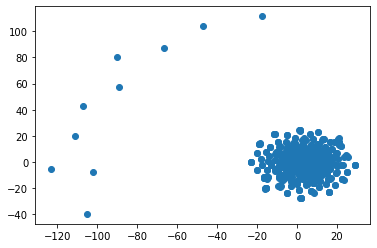

,0,1
0,17.135918,0.170596
1,17.352077,0.191240
2,-4.480114,-6.142069
3,-0.101496,5.021989
4,-9.842707,6.571695
...,...,...
527,1.513560,24.589663
528,-23.009773,-0.126983
529,-4.968787,1.195079
530,-4.079973,10.375439


In [5]:
# run t-SNE on the principal components: the output of the PCA transformation. 
tsne = TSNE(learning_rate=250)
tsne_feat = tsne.fit_transform(pca_components)
print(tsne_feat.shape)
df_tsne = pd.DataFrame(
    data=tsne_feat
)

#  create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.
plt.scatter(tsne_feat[:,0], tsne_feat[:,1])
plt.show()
df_tsne

# Cluster Analysis with k-Means

In [6]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each k between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\amber\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,251091.921875
1,2,153465.843750
2,3,113734.406250
3,4,88215.609375
4,5,64083.328125


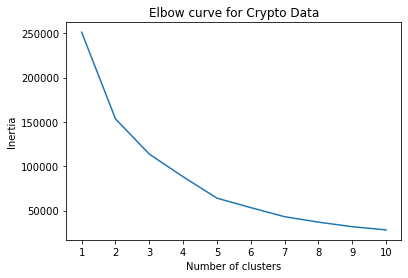

In [7]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Crypto Data')
plt.show()

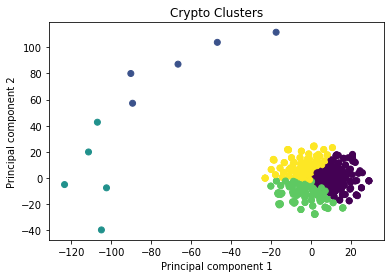

In [8]:
# Predicting clusters with k=5

# Initialize the k-means model
model = KMeans(n_clusters=5, random_state=0)

# Fit the model
model.fit(df_tsne)

# Predict clusters
predictions = model.predict(df_tsne)

# Add the predicted class column to the dataframe
df_tsne["class"] = model.labels_
df_tsne.head()
# Visualize the clusters
plt.scatter(x=df_tsne[0], y=df_tsne[1], c=df_tsne['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Crypto Clusters')
plt.show()

# Recommendation

Based on the findings above, cryptocurrencies can be clustered into 5 clusters.
